# Worksheet A-5: Working With Factors & Tibble Joins

## Getting Started

Load the requirements for this worksheet:

In [ ]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tsibble))
suppressPackageStartupMessages(library(gapminder))
suppressPackageStartupMessages(library(testthat))
suppressPackageStartupMessages(library(digest))
suppressMessages({
  time <- read_csv("https://raw.githubusercontent.com/STAT545-UBC/Classroom/master/data/singer/songs.csv") %>% 
    rename(song = title)
  album <- read_csv("https://raw.githubusercontent.com/STAT545-UBC/Classroom/master/data/singer/loc.csv") %>% 
    select(title, everything()) %>% 
    rename(song = title, album = release)
})
suppressMessages({
  fell <- read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/The_Fellowship_Of_The_Ring.csv")
  ttow <- read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/The_Two_Towers.csv")
  retk <- read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/The_Return_Of_The_King.csv")
})

The following code chunk has been unlocked, to give you the flexibility to start this document with some of your own code. Remember, it's bad manners to keep a call to `install.packages()` in your source code, so don't forget to delete these lines if you ever need to run them.

In [ ]:
# An unlocked code cell.

# Part 0: Dates and Tsibble 

We'll convert dates into a year-month object with the tsibble package (loaded at the start of the worksheet).

## Question 0.1

Consider the built-in presidential dataset that looks at the start and ending terms of US presidents:

In [11]:
head(presidential)

name,start,end,party
<chr>,<date>,<date>,<chr>
Eisenhower,1953-01-20,1961-01-20,Republican
Kennedy,1961-01-20,1963-11-22,Democratic
Johnson,1963-11-22,1969-01-20,Democratic
Nixon,1969-01-20,1974-08-09,Republican
Ford,1974-08-09,1977-01-20,Republican
Carter,1977-01-20,1981-01-20,Democratic


Use `tsibble::yearmonth()` to convert the existing start and end column dates into only year and month. Name this tibble `president_ym`.

```
president_ym <- presidential %>%
   mutate(start = FILL_THIS_IN, 
          end = FILL_THIS_IN)
```

In [12]:
president_ym <- presidential %>%
   mutate(start = tsibble::yearmonth(start), 
          end = tsibble::yearmonth(end))
head(president_ym)

name,start,end,party
<chr>,<mth>,<mth>,<chr>
Eisenhower,1953 Jan,1961 Jan,Republican
Kennedy,1961 Jan,1963 Nov,Democratic
Johnson,1963 Nov,1969 Jan,Democratic
Nixon,1969 Jan,1974 Aug,Republican
Ford,1974 Aug,1977 Jan,Republican
Carter,1977 Jan,1981 Jan,Democratic


In [5]:
test_that("Question 0.1", expect_known_hash(president_ym[1,], "8b9ac24bc52a692ab7d1bd83f9e0a19c"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


# Part 1: Creating Factors

For the best experience working with factors in R, we will use the forcats package, which is part of the tidyverse metapackage.

## Question 1.1

Using the gapminder dataset from the gapminder package, create a new data set for the year 1997, adding a new column `life_level` containing 5 new levels according to the following table.

| Criteria          |`life_level`   | 
|-------------------|-------------|
| less than 23      | very low    |
| between 23 and 48 | low         |
| between 48 and 59 | moderate    |
| between 59 and 70 | high        |
| more than 70      | very high   |

Store this new data frame in variable `gapminder_1997`.

**Hint**: We are using `case_when()`, a tidier way to vectorise multiple `if_else()` statements.
You can read more about this function [in the tidyverse reference](https://dplyr.tidyverse.org/reference/case_when.html).

```
gapminder_1997 <- gapminder %>% 
   FILL_THIS_IN(year == FILL_THIS_IN) %>% 
   FILL_THIS_IN(life_level = case_when(FILL_THIS_IN < FILL_THIS_IN ~ "very low",
                                 FILL_THIS_IN < FILL_THIS_IN ~ "low",
                                 FILL_THIS_IN < FILL_THIS_IN ~ "moderate",
                                 FILL_THIS_IN < FILL_THIS_IN ~ "high",
                                 TRUE ~ "very high"))
```

In [13]:
gapminder_1997 <- gapminder %>% 
   filter(year == 1997) %>% 
   mutate(life_level = case_when(lifeExp < 23 ~ "very low",
                                 lifeExp < 48 ~ "low",
                                 lifeExp < 59 ~ "moderate",
                                 lifeExp < 70 ~ "high",
                                 TRUE ~ "very high"))
head(gapminder_1997)

country,continent,year,lifeExp,pop,gdpPercap,life_level
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<chr>
Afghanistan,Asia,1997,41.763,22227415,635.3414,low
Albania,Europe,1997,72.950,3428038,3193.0546,very high
Algeria,Africa,1997,69.152,29072015,4797.2951,high
Angola,Africa,1997,40.963,9875024,2277.1409,low
Argentina,Americas,1997,73.275,36203463,10967.2820,very high
Australia,Oceania,1997,78.830,18565243,26997.9366,very high


In [14]:
test_that("Question 1.1", expect_known_hash(table(gapminder_1997$life_level), "3d2e691667d4706e66ce5784bb1d7042"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


FYI: We can now plot boxplots for the GDP per capita per level of life expectancy.
Run the following code to see the boxplots.

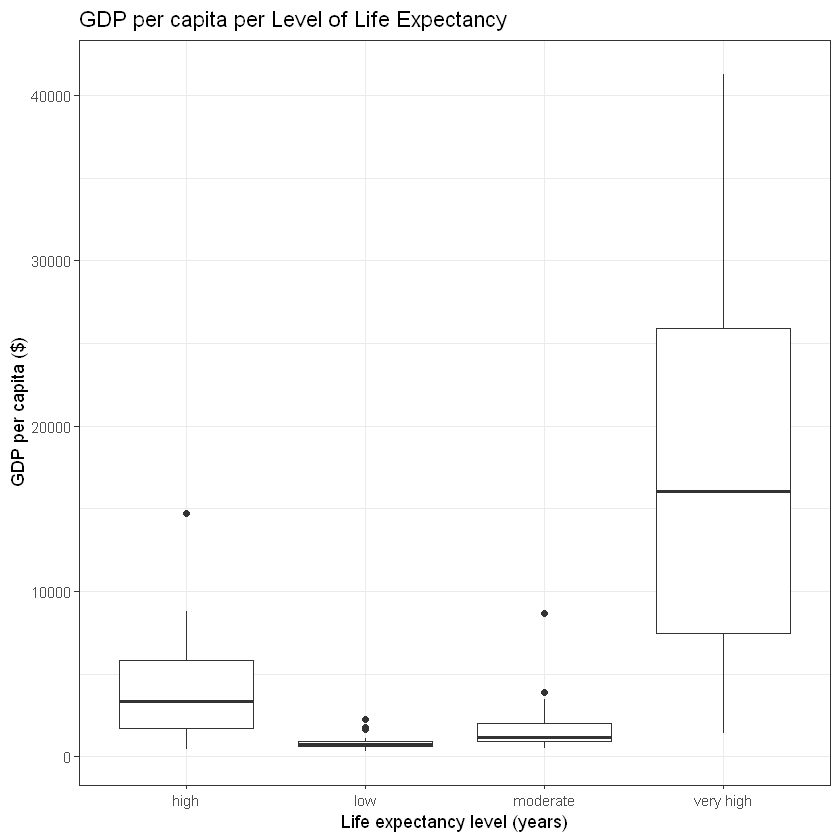

In [15]:
ggplot(gapminder_1997) + geom_boxplot(aes(x = life_level, y = gdpPercap)) +
  labs(y = "GDP per capita ($)", x = "Life expectancy level (years)") +
  ggtitle("GDP per capita per Level of Life Expectancy") +
  theme_bw() 

## Question 1.2

Notice a few oddities in the above plot:

- It seems that none of the countries had a "very low" life-expectancy in 1997. 
- However, since it was an option in our analysis it should be included in our plot. Right?
- Notice also how levels on x-axis are placed in the "wrong" order. (in alphabetical order)

You can correct these issues by explicitly making `life_level` a factor and setting the levels parameter.
Create a new data frame as in Question 1.1, but make the column `life_level` a factor with levels ordered from *very low* to *very high*.
Store this new data frame in variable `gapminder_1997_fct`.

```
gapminder_1997_fct <- gapminder %>% 
   FILL_THIS_IN(year == 1997) %>% 
   FILL_THIS_IN(life_level = FILL_THIS_IN(case_when(FILL_THIS_IN < FILL_THIS_IN ~ "very low",
                                        FILL_THIS_IN < FILL_THIS_IN ~ "low",
                                        FILL_THIS_IN < FILL_THIS_IN ~ "moderate",
                                        FILL_THIS_IN < FILL_THIS_IN ~ "high",
                                        TRUE ~ "very high"),
                              levels = c('FILL_THIS_IN', 'FILL_THIS_IN', 'FILL_THIS_IN', 'FILL_THIS_IN', 'FILL_THIS_IN')))
```

In [16]:
gapminder_1997_fct <- gapminder %>% 
   filter(year == 1997) %>% 
   mutate(life_level = factor(case_when(lifeExp < 23 ~ "very low",
                                 lifeExp < 48 ~ "low",
                                 lifeExp < 59 ~ "moderate",
                                 lifeExp < 70 ~ "high",
                                 TRUE ~ "very high"),
                              levels = c('very low', 'low', 'moderate', 'high', 'very high')))
head(gapminder_1997_fct)

country,continent,year,lifeExp,pop,gdpPercap,life_level
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>
Afghanistan,Asia,1997,41.763,22227415,635.3414,low
Albania,Europe,1997,72.950,3428038,3193.0546,very high
Algeria,Africa,1997,69.152,29072015,4797.2951,high
Angola,Africa,1997,40.963,9875024,2277.1409,low
Argentina,Americas,1997,73.275,36203463,10967.2820,very high
Australia,Oceania,1997,78.830,18565243,26997.9366,very high


In [17]:
test_that("Question 1.2", expect_known_hash(table(gapminder_1997_fct$life_level), "8e62f09fbd0756d7e69d1bc95715d333"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


Run the following code to see the boxplots from the new data frame with life expectancy level as factor.

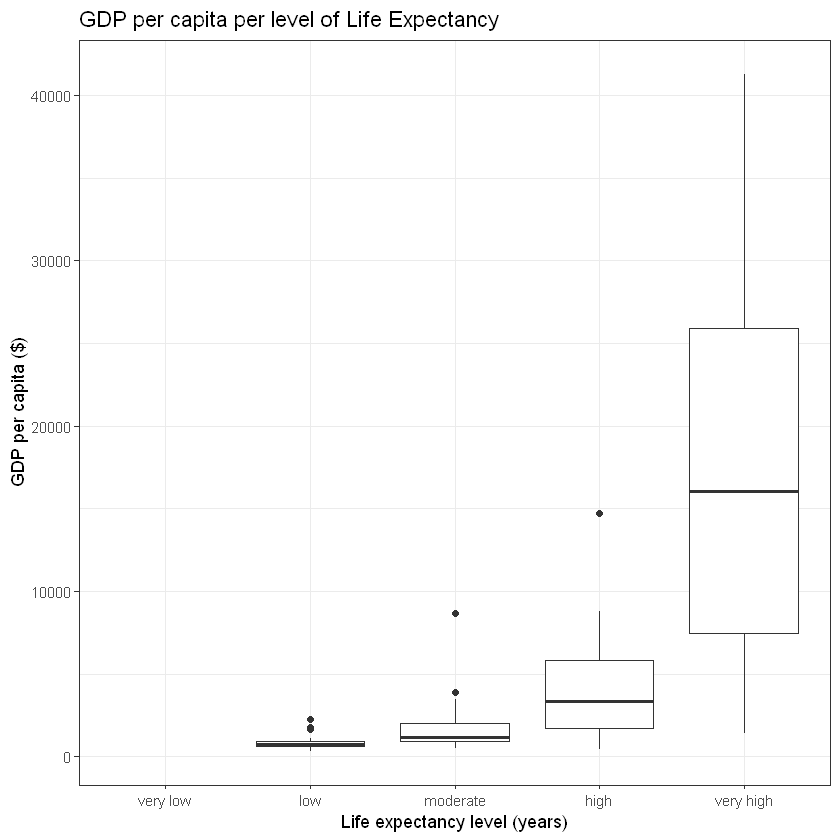

In [18]:
ggplot(gapminder_1997_fct) + geom_boxplot(aes(x = life_level, y = gdpPercap)) +
  labs(y = "GDP per capita ($)", x= "Life expectancy level (years)") +
  scale_x_discrete(drop = FALSE) + # Don't drop the very low factor
  ggtitle("GDP per capita per level of Life Expectancy") +
  theme_bw() 

# Part 2: Inspecting Factors

In Part 1, you created your own factors, so now let's explore what categorical variables are in the `gapminder` dataset.

## Question 2.1

What levels does the column `continent` have?
Assign the levels to variable `continent_levels`, using the `levels()` function. (To mix things up a bit, the template code we're giving you extracts a column using the Base R way of extracting columns -- with a dollar sign.)

```
continent_levels <- FILL_THIS_IN(gapminder$FILL_THIS_IN)
```

In [19]:
continent_levels <- levels(gapminder$continent)
print(continent_levels)

[1] "Africa"   "Americas" "Asia"     "Europe"   "Oceania" 


In [20]:
test_that("Question 2.1", expect_known_hash(continent_levels, "6926255b7f073fb8e7d89773802102a6"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


## Question 2.2

How many levels does the column `country` have?
Assign the number of levels to variable `gap_nr_countries`. Hint: there's a function called `nlevels()`. 

```
gap_nr_countries <- FILL_THIS_IN(gapminder$FILL_THIS_IN)
```

In [21]:
gap_nr_countries <- nlevels(gapminder$country)
print(gap_nr_countries)

[1] 142


In [22]:
test_that("Question 2.2", expect_known_hash(as.integer(gap_nr_countries), "3b6d002135d8d45a3c5f4a9fb857c323"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


## Question 2.3

Consider we are only interested in the following 5 countries: Egypt, Haiti, Romania, Thailand, and Venezuela.
Create a new data frame with only these 5 countries and store it in variable `gap_5`. _Hint_: nothing new here -- use your dplyr knowledge!

```
gap_5 <- gapminder %>%
   FILL_THIS_IN(FILL_THIS_IN %in% c("FILL_THIS_IN", "FILL_THIS_IN", "FILL_THIS_IN", "FILL_THIS_IN", "FILL_THIS_IN"))
```

In [23]:
gap_5 <- gapminder %>%
   filter(country %in% c("Egypt", "Haiti", "Romania", "Thailand", "Venezuela"))
head(gap_5)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Egypt,Africa,1952,41.893,22223309,1418.822
Egypt,Africa,1957,44.444,25009741,1458.915
Egypt,Africa,1962,46.992,28173309,1693.336
Egypt,Africa,1967,49.293,31681188,1814.881
Egypt,Africa,1972,51.137,34807417,2024.008
Egypt,Africa,1977,53.319,38783863,2785.494


In [24]:
test_that("Question 2.3", {
  expect_known_hash(dim(gap_5), "6c0f8c2a8d488051f33fc89b2c327dcd")
  expect_known_hash(table(gap_5$country), "05b8ca3033e94f96b9ec5422a69c1207")
})

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


## Question 2.4

However, subsetting the data set does not affect the levels of the factors.
The column `country` in tibble `gap_5` still has the same number of levels as in the original data frame.

Your task: create a new tibble from `gap_5`, where all unused levels from column `country` are dropped. _Hint_: use the `droplevels()` function. Store new new tibble in variable `gap_5_dropped`.

By way of demonstration, check the number of levels in the "country" column before and after the change -- we've included the code for this for you.

```
nlevels(gap_5$country)
gap_5_dropped <- FILL_THIS_IN(FILL_THIS_IN)
nlevels(gap_5_dropped$country)
```

In [25]:
nlevels(gap_5$country)
gap_5_dropped <- droplevels(gap_5)
nlevels(gap_5_dropped$country)
head(gap_5_dropped)

[1] 142

[1] 5

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Egypt,Africa,1952,41.893,22223309,1418.822
Egypt,Africa,1957,44.444,25009741,1458.915
Egypt,Africa,1962,46.992,28173309,1693.336
Egypt,Africa,1967,49.293,31681188,1814.881
Egypt,Africa,1972,51.137,34807417,2024.008
Egypt,Africa,1977,53.319,38783863,2785.494


In [26]:
test_that("Question 2.4", expect_known_hash(sort(levels(gap_5_dropped$country)), "ac97b9af845a59395697b028c5121503"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


## Question 2.5

The factor levels of column `continent` in data frame `gapminder` are ordered alphabetically.
Create a new data frame, with the levels of column `continent` in *increasing* order according to their frequency (i.e., the number of rows for each continent).
Store the new data frame in variable `gap_continent_freq`. *Hint*: Use `fct_infreq()` and `fct_rev()`.

```
gap_continent_freq <- gapminder %>%
   mutate(continent = FILL_THIS_IN(FILL_THIS_IN(continent)))
```

**Hint**: The first `FILL_THIS_IN` corresponds to a `fct_*` function that reverses the levels of the factors. The second `FILL_THIS_IN` correspond to a `fct_*` function that orders the levels by *decreasing* frequency.

In [27]:
gap_continent_freq <- gapminder %>%
   mutate(continent = fct_rev(fct_infreq(continent)))
head(gap_continent_freq)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [28]:
test_that("Question 2.5", expect_known_hash(table(gap_continent_freq$continent), "0bb23ea87ce71deb5452eaae8cdbf7cf"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


FYI: You can't "see" any difference in the tibble, but there are _attributes_ behind the hood keeping track of the order of the "continent" entries. You _can_ see the difference, however, in a plot, as below. Notice how the x-axis is no longer ordered alphabetically.

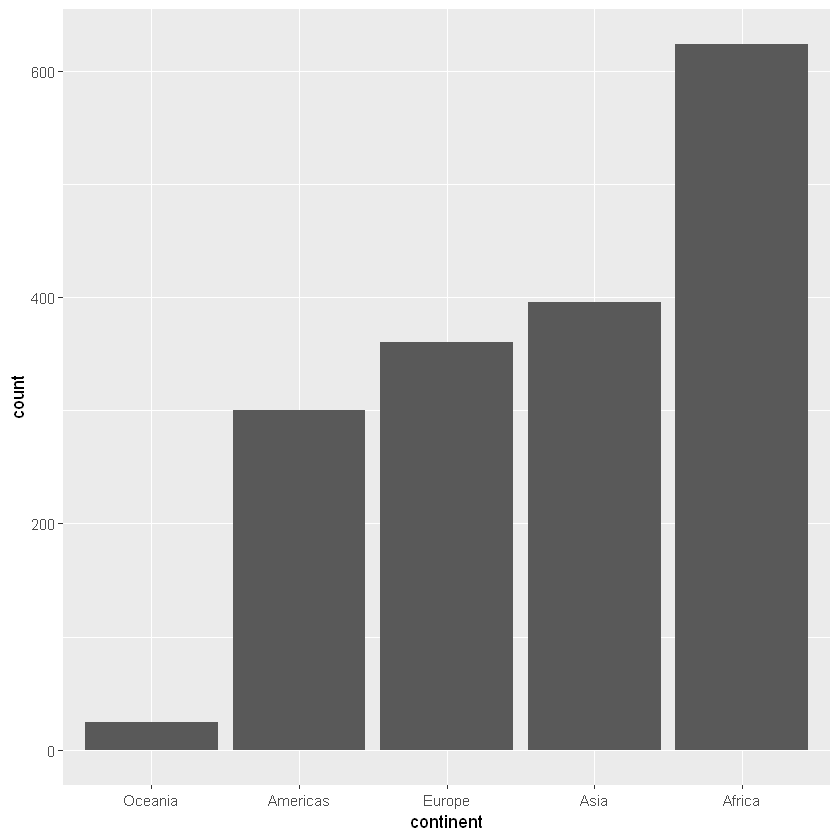

In [29]:
ggplot(gap_continent_freq, aes(continent)) + geom_bar()

## Question 2.6

Again based on the `gapminder` data set, create another data frame, with the levels of column `continent` in *increasing* order of their average life expectancy (from column `lifeExp`).
Store the new data frame in variable `gap_continent_life`. _Hint_: use `fct_reorder()`.

```
gap_continent_life <- gapminder %>%
   mutate(continent = FILL_THIS_IN(FILL_THIS_IN, FILL_THIS_IN, FILL_THIS_IN))
```

In [30]:
gap_continent_life <- gapminder %>%
   mutate(continent = fct_reorder(continent, lifeExp, mean))
head(gap_continent_life)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [31]:
test_that("Question 2.6", expect_known_hash(table(gap_continent_life$continent), "7688676a0807063f1bfa5b4cc721c2d9"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


Again, you can't "see" any difference in the tibble. But here's a plot that makes the difference clearer. Notice the ordering of the x-axis.

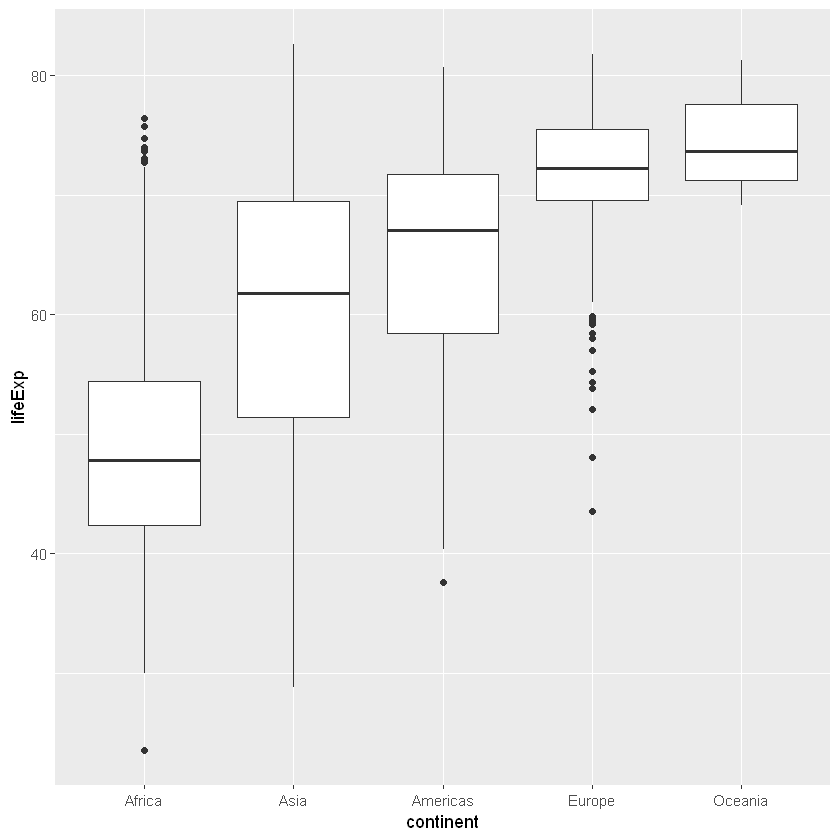

In [32]:
ggplot(gap_continent_life, aes(continent, lifeExp)) + geom_boxplot()

## Question 2.7

Consider now you want to make comparisons between countries, relative to Canada.
Create a new data frame, with the levels of column `country` rearranged to have Canada as the first one.
Store the new data frame in variable `gap_canada_base`.

```
(gap_canada_base <- gapminder %>%
   mutate(country = FILL_THIS_IN(FILL_THIS_IN, "FILL_THIS_IN")))
```

In [33]:
(gap_canada_base <- gapminder %>%
   mutate(country = fct_relevel(country, "Canada")))
head(gap_canada_base)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [34]:
test_that("Question 2.7", expect_known_hash(table(gap_canada_base$country), "72d75ce05a16d8965f7bd0ae3fb986d3"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


Take a look at the levels of the "country" factor, and you'll now see Canada first:

In [35]:
gap_canada_base %>% 
   pull(country) %>% 
   levels()

[1] "Canada"                   "Afghanistan"             
  [3] "Albania"                  "Algeria"                 
  [5] "Angola"                   "Argentina"               
  [7] "Australia"                "Austria"                 
  [9] "Bahrain"                  "Bangladesh"              
 [11] "Belgium"                  "Benin"                   
 [13] "Bolivia"                  "Bosnia and Herzegovina"  
 [15] "Botswana"                 "Brazil"                  
 [17] "Bulgaria"                 "Burkina Faso"            
 [19] "Burundi"                  "Cambodia"                
 [21] "Cameroon"                 "Central African Republic"
 [23] "Chad"                     "Chile"                   
 [25] "China"                    "Colombia"                
 [27] "Comoros"                  "Congo, Dem. Rep."        
 [29] "Congo, Rep."              "Costa Rica"              
 [31] "Cote d'Ivoire"            "Croatia"                 
 [33] "Cuba"                     "Czech Republic"          
 [35] "Denmark"                  "Djibouti"                
 [37] "Dominican Republic"       "Ecuador"                 
 [39] "Egypt"                    "El Salvador"             
 [41] "Equatorial Guinea"        "Eritrea"                 
 [43] "Ethiopia"                 "Finland"                 
 [45] "France"                   "Gabon"                   
 [47] "Gambia"                   "Germany"                 
 [49] "Ghana"                    "Greece"                  
 [51] "Guatemala"                "Guinea"                  
 [53] "Guinea-Bissau"            "Haiti"                   
 [55] "Honduras"                 "Hong Kong, China"        
 [57] "Hungary"                  "Iceland"                 
 [59] "India"                    "Indonesia"               
 [61] "Iran"                     "Iraq"                    
 [63] "Ireland"                  "Israel"                  
 [65] "Italy"                    "Jamaica"                 
 [67] "Japan"                    "Jordan"                  
 [69] "Kenya"                    "Korea, Dem. Rep."        
 [71] "Korea, Rep."              "Kuwait"                  
 [73] "Lebanon"                  "Lesotho"                 
 [75] "Liberia"                  "Libya"                   
 [77] "Madagascar"               "Malawi"                  
 [79] "Malaysia"                 "Mali"                    
 [81] "Mauritania"               "Mauritius"               
 [83] "Mexico"                   "Mongolia"                
 [85] "Montenegro"               "Morocco"                 
 [87] "Mozambique"               "Myanmar"                 
 [89] "Namibia"                  "Nepal"                   
 [91] "Netherlands"              "New Zealand"             
 [93] "Nicaragua"                "Niger"                   
 [95] "Nigeria"                  "Norway"                  
 [97] "Oman"                     "Pakistan"                
 [99] "Panama"                   "Paraguay"                
[101] "Peru"                     "Philippines"             
[103] "Poland"                   "Portugal"                
[105] "Puerto Rico"              "Reunion"                 
[107] "Romania"                  "Rwanda"                  
[109] "Sao Tome and Principe"    "Saudi Arabia"            
[111] "Senegal"                  "Serbia"                  
[113] "Sierra Leone"             "Singapore"               
[115] "Slovak Republic"          "Slovenia"                
[117] "Somalia"                  "South Africa"            
[119] "Spain"                    "Sri Lanka"               
[121] "Sudan"                    "Swaziland"               
[123] "Sweden"                   "Switzerland"             
[125] "Syria"                    "Taiwan"                  
[127] "Tanzania"                 "Thailand"                
[129] "Togo"                     "Trinidad and Tobago"     
[131] "Tunisia"                  "Turkey"                  
[133] "Uganda"                   "United K

## Question 2.8

Sometimes you want to manually change a few factor levels, e.g., if the level is too wide for plotting.
Based on the `gapminder` data set, create a new data frame with the Central African Republic renamed to *Central African Rep.* and Bosnia and Herzegovina renamed to *Bosnia & Herzegovina*.
Store the new data frame in variable `gap_car`. _Hint_: use `fct_recode()`.

```
gap_car <- gapminder %>%
   mutate(country = FILL_THIS_IN(FILL_THIS_IN, "Central African Rep." = "FILL_THIS_IN",
                               "Bosnia & Herzegovina" = "FILL_THIS_IN"))
```

In [36]:
gap_car <- gapminder %>%
   mutate(country = fct_recode(country, "Central African Rep." = "Central African Republic",
                               "Bosnia & Herzegovina" = "Bosnia and Herzegovina"))
head(gap_car)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [37]:
test_that("Question 2.8", expect_known_hash(table(gap_car$country), "9cc15f09cb70b5596bbf3feaa73ee471"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


# Part 3: Tibble Joins

At the start of this worksheet, we loaded a couple datasets from the [singer](https://github.com/JoeyBernhardt/singer) package, and called them `time` and `album`. These two data sets contain information about a few popular songs and albums.

We'll practice various joins using these two datasets. You'll need to find out which join is appropriate for each case!

Run the following R codes to look at the two data sets:

In [38]:
head(time)

song,artist_name,year
<chr>,<chr>,<dbl>
Corduroy,Pearl Jam,1994
Grievance,Pearl Jam,2000
Stupidmop,Pearl Jam,1994
Present Tense,Pearl Jam,1996
MFC,Pearl Jam,1998
Lukin,Pearl Jam,1996


In [61]:
head(album)

song,artist_name,city,album
<chr>,<chr>,<chr>,<chr>
Grievance,Pearl Jam,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,"Seattle, WA",No Code
MFC,Pearl Jam,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,"Seattle, WA",Seattle Washington November 5 2000
Stuck On Amber,The Boo Radleys,"Liverpool, England",Wake Up!


## Question 3.1

Create a new data frame containing all songs from `time` that have a corresponding album in the `album` dataset, while also adding the album information. Store the joined data set in variable `songs_with_album`.

```
songs_with_album <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN"))
```

In [58]:
songs_with_album <- time %>%
  inner_join(album, by = c("song", "artist_name"))
head(songs_with_album)

song,artist_name,year,city,album
<chr>,<chr>,<dbl>,<chr>,<chr>
Grievance,Pearl Jam,2000,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,1994,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,1996,"Seattle, WA",No Code
MFC,Pearl Jam,1998,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,1996,"Seattle, WA",Seattle Washington November 5 2000
It's Lulu,The Boo Radleys,1995,"Liverpool, England",Best Of


In [59]:
test_that("Question 3.1", {
  expect_known_hash(sort(songs_with_album$song), "146ff293a74ccc1ad24505a6bc0b6682")
  expect_known_hash(table(songs_with_album$artist_name), "51f7daeec65e839e5ae6c84ac5a1cb70")
})

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


-- Failure (<text>:2:3): Question 3.1 ------------------------------------------
Value hashes to f76d75b00fa39cf3103416e36a545ddf, not 146ff293a74ccc1ad24505a6bc0b6682



## Question 3.2

Go ahead and add the corresponding albums to the `time` tibble, being sure to preserve rows even if album info is not readily available.
Store the joined data set in variable `all_songs`.

```
all_songs <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN"))
```

In [70]:
all_songs <- time %>% 
  left_join(album, by = c("song", "artist_name"))
head(all_songs)

song,artist_name,year,city,album
<chr>,<chr>,<dbl>,<chr>,<chr>
Corduroy,Pearl Jam,1994,NA,NA
Grievance,Pearl Jam,2000,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,1994,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,1996,"Seattle, WA",No Code
MFC,Pearl Jam,1998,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,1996,"Seattle, WA",Seattle Washington November 5 2000


In [71]:
test_that("Question 3.2", {
  expect_known_hash(sort(all_songs$song), "dd1c0b2e14a879cb1a6f07077ed38e97")
  expect_known_hash(all_songs$album[order(all_songs$song)], "2baea3c1a23797fdac5a9e0dc119073e")
})

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


-- Failure (<text>:2:3): Question 3.2 ------------------------------------------
Value hashes to b6a0faa350d8f365e415bda4653191f6, not dd1c0b2e14a879cb1a6f07077ed38e97

-- Failure (<text>:3:3): Question 3.2 ------------------------------------------
Value hashes to c8744340b70f54ae54b45ea7d8357e67, not 2baea3c1a23797fdac5a9e0dc119073e



## Question 3.3: Joining Rows by Columns

Create a new tibble with songs from `time` for which there is no album info.
Store the new data set in variable `songs_without_album`.

```
songs_without_album <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN"))
```

In [68]:
songs_without_album <- time %>% 
  anti_join(album, by = c("song", "artist_name"))
head(songs_without_album)

song,artist_name,year
<chr>,<chr>,<dbl>
Corduroy,Pearl Jam,1994
Martin_ Doom! It's Seven O'Clock,The Boo Radleys,1995
Leaves And Sand,The Boo Radleys,1993
Comb Your Hair,The Boo Radleys,1998
Mine Again,Mariah Carey,2005
Don't Forget About Us,Mariah Carey,2005


In [69]:
test_that("Question 3.3", expect_known_hash(sort(songs_without_album$song), "3e6a210ad915fb07eb7e894a7ca0e856"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


## Question 3.4

Create a new tibble with all songs from artists for whom there is no album information.
Store the new data set in variable `songs_artists_no_album`.

```
songs_artists_no_album <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = "FILL_THIS_IN")
```

In [75]:
songs_artists_no_album <- time %>% 
  anti_join(album, by = "artist_name")
head(songs_artists_no_album)

song,artist_name,year
<chr>,<chr>,<dbl>
Mine Again,Mariah Carey,2005
Don't Forget About Us,Mariah Carey,2005
Babydoll,Mariah Carey,1997
Don't Forget About Us,Mariah Carey,2005
Vision Of Love,Mariah Carey,1990


In [76]:
test_that("Question 3.4", expect_known_hash(table(songs_artists_no_album$artist_name), 
                                            "244510c51477c31e6e795cbc0ca0b0d7"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


## Question 3.5
Create a new tibble with all the information from both tibbles, regardless of no corresponding information being present in the other tibble.
Store the new data set in variable `all_songs_and_albums`.

```
all_songs_and_albums <- time %>% 
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN"))
```

In [77]:
all_songs_and_albums <- time %>% 
 full_join(album, by = c("song", "artist_name"))
head(all_songs_and_albums)

song,artist_name,year,city,album
<chr>,<chr>,<dbl>,<chr>,<chr>
Corduroy,Pearl Jam,1994,NA,NA
Grievance,Pearl Jam,2000,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,1994,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,1996,"Seattle, WA",No Code
MFC,Pearl Jam,1998,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,1996,"Seattle, WA",Seattle Washington November 5 2000


In [78]:
test_that("Question 3.5", {
  expect_known_hash(sort(all_songs_and_albums$song), "ba2ba3507e50c56d21028893404259a5")
  expect_known_hash(with(all_songs_and_albums, album[order(song)]), "dbc70af8d3078ea830be9cfb0dee6b9d")
  expect_known_hash(with(all_songs_and_albums, year[order(song)]), "10669b0750ab4d53b54f0e509430e2d1")
})

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


-- Failure (<text>:2:3): Question 3.5 ------------------------------------------
Value hashes to c497c2e708d516f2d7b6215bb7796755, not ba2ba3507e50c56d21028893404259a5

-- Failure (<text>:3:3): Question 3.5 ------------------------------------------
Value hashes to ac73bb336fa9fbf3f6c52e40b22595e9, not dbc70af8d3078ea830be9cfb0dee6b9d

-- Failure (<text>:4:3): Question 3.5 ------------------------------------------
Value hashes to 2ae534811f30a95e7d15b3f9165ccb54, not 10669b0750ab4d53b54f0e509430e2d1



## Part 4: Concatenating Rows

At the start of the worksheet, we loaded three Lord of the Rings datasets (one for each of the three movies). Run the following R codes to take a look at the 3 tibbles:

In [79]:
fell

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Fellowship Of The Ring,Elf,1229,971
The Fellowship Of The Ring,Hobbit,14,3644
The Fellowship Of The Ring,Man,0,1995


In [80]:
ttow

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Two Towers,Elf,331,513
The Two Towers,Hobbit,0,2463
The Two Towers,Man,401,3589


In [81]:
retk

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Return Of The King,Elf,183,510
The Return Of The King,Hobbit,2,2673
The Return Of The King,Man,268,2459


## Question 4.1

Combine the three data sets into a single tibble, storing the new tibble in variable `lotr`.

```
lotr <- FILL_THIS_IN(fell, ttow, retk)
```

In [82]:
lotr <- bind_rows(fell, ttow, retk)
print(lotr)

# A tibble: 9 x 4
  Film                       Race   Female  Male
  <chr>                      <chr>   <dbl> <dbl>
1 The Fellowship Of The Ring Elf      1229   971
2 The Fellowship Of The Ring Hobbit     14  3644
3 The Fellowship Of The Ring Man         0  1995
4 The Two Towers             Elf       331   513
5 The Two Towers             Hobbit      0  2463
6 The Two Towers             Man       401  3589
7 The Return Of The King     Elf       183   510
8 The Return Of The King     Hobbit      2  2673
9 The Return Of The King     Man       268  2459


In [83]:
test_that("Question 4.1", expect_known_hash(table(lotr$Film), "41c29122f6c217d447e85a9069f5a92f"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


# Part 5: Set Operations

Let's use three set functions: `intersect()`, `union()` and `setdiff()`.
They work for data frames with the same column names.

We'll work with two toy tibbles named `y` and `z`, similar to the Data Wrangling Cheatsheet.

Run the following R codes to create the data.

In [84]:
(y <-  tibble(x1 = LETTERS[1:3], x2 = 1:3))

x1,x2
<chr>,<int>
A,1
B,2
C,3


In [85]:
(z <- tibble(x1 = c("B", "C", "D"), x2 = 2:4))

x1,x2
<chr>,<int>
B,2
C,3
D,4


## Question 5.1

Use one of the three methods mentioned above to create a new data set which contains all rows that appear in both `y` and `z`.
Store the new data frame in variable `in_both`

```
in_both <- FILL_THIS_IN(y, z)
```

In [86]:
in_both <- intersect(y, z)
in_both

x1,x2
<chr>,<int>
B,2
C,3


In [87]:
test_that("Question 5.1", expect_known_hash(in_both$x1, "745ec49ab3231655a04484be44a15f98"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


## Question 5.2
Assume that rows in `y` are from *Day 1* and rows in `z` are from *Day 2*.
Create a new data set with all rows from `y` and `z`, as well as an additional column `day` which is *Day 1* for rows from `y` and *Day 2* for rows from `z`.
Store the new data set in variable `both_days`.

```
both_days <- FILL_THIS_IN(
  mutate(y, day = "Day 1"),
  mutate(z, day = "Day 2")
)
```

In [88]:
both_days <- union(
  mutate(y, day = "Day 1"),
  mutate(z, day = "Day 2")
)
both_days

x1,x2,day
<chr>,<int>,<chr>
A,1,Day 1
B,2,Day 1
C,3,Day 1
B,2,Day 2
C,3,Day 2
D,4,Day 2


In [89]:
test_that("Question 5.2", expect_known_hash(with(both_days, x1[order(x2, day)]), "66b9eefd39c2f0b5d130453c139a2051"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


## Question 5.3

The rows contained in `z` are bad.
Use one of the three methods mentioned above to create a new data set which contains only the rows from `y` which are not in `z`.
Store the new data frame in variable `only_y`

```
only_y <- FILL_THIS_IN(y, z)
```

In [92]:
only_y <- setdiff(y, z)
only_y

x1,x2
<chr>,<int>
A,1


In [93]:
test_that("Question 5.3", expect_known_hash(only_y$x1, "75f1160e72554f4270c809f041c7a776"))

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a/worksheets": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ/stat545a": The system cannot find the path specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:/Users/41615/OneDrive/×ÀÃæ": The system cannot find the file specified"


Test passed 


### Attribution

Assembled by Almas Khan and Vincenzo Coia, reviewed by Diana Lin, and assisted by David Kepplinger.